# Data Preprocessing

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
ds = pd.read_csv("Google_Stock_Price_Train.csv")

In [3]:
training_set = ds.iloc[:,1:2].values

In [9]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

Scaling

In [5]:
from sklearn.preprocessing import MinMaxScaler as mms

In [6]:
sc = mms(feature_range = (0, 1))

In [7]:
scaled_training_set = sc.fit_transform(training_set)

In [8]:
scaled_training_set

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

Splitting

In [4]:
xtrain = []
ytrain = []

In [10]:
for i in range(60, 1258):
    
    xtrain.append(scaled_training_set[i-60:i, 0])
    ytrain.append(scaled_training_set[i, 0])
    
xtrain, ytrain = np.array(xtrain), np.array(ytrain)

In [11]:
xtrain

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [12]:
ytrain

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

Reshaping

In [13]:
xtrain = np.reshape(xtrain, (xtrain.shape[0], xtrain.shape[1], 1))

# Building RNN via LSTM

In [15]:
from keras.models import Sequential as sq
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout #drop the neurons which output is zero

In [16]:
regressor = sq()

In [19]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (xtrain.shape[1], 1))) #1st layer
regressor.add(Dropout(0.2))

In [20]:
regressor.add(LSTM(units = 50, return_sequences = True)) #2nd layer
regressor.add(Dropout(0.2))

In [21]:
regressor.add(LSTM(units = 50, return_sequences = True)) #3rd layer
regressor.add(Dropout(0.2))

In [22]:
regressor.add(LSTM(units = 50)) #4th and fianl hidden layer
regressor.add(Dropout(0.2))

In [23]:
regressor.add(Dense(units = 1)) #output layer

In [25]:
regressor.compile(optimizer = "adam", loss = "mean_squared_error")

In [27]:
regressor.fit(xtrain, ytrain, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0041
Epoch 2/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0048
Epoch 3/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0045
Epoch 4/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0043
Epoch 5/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0042
Epoch 6/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0041
Epoch 7/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0041
Epoch 8/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0048
Epoch 9/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0042
Epoch 10/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0036A: 1s -
Epoch 11/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0042
Epoch 12/100
1198/1198 [==============================] - 4s 3ms/st

1198/1198 [==============================] - 4s 3ms/step - loss: 0.0015
Epoch 98/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0012
Epoch 99/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0012
Epoch 100/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0015


# Prediction

In [42]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [43]:
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [44]:
dataset_total = pd.concat((ds['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [45]:
xtest = []

In [46]:
for i in range(60, 80):
    xtest.append(inputs[i-60:i, 0])

In [47]:
xtest

[array([0.9299055 , 0.93113327, 0.92750577, 0.94415507, 0.93876032,
        0.93403527, 0.93483518, 0.9313937 , 0.94636878, 0.96569685,
        0.97510976, 0.95966962, 0.97808617, 1.        , 0.98076494,
        0.97083116, 0.98450406, 0.96054394, 0.9371419 , 0.92841729,
        0.90804747, 0.8771858 , 0.92153434, 0.93809063, 0.93165414,
        0.95254483, 0.88812412, 0.88637547, 0.87032145, 0.88563137,
        0.90743359, 0.91571173, 0.89941588, 0.91805566, 0.9089404 ,
        0.9024853 , 0.89456061, 0.91600938, 0.9132934 , 0.88979835,
        0.86589404, 0.89030062, 0.90335962, 0.89642086, 0.91777662,
        0.93176576, 0.94114145, 0.95762334, 0.96413424, 0.96402262,
        0.96971501, 0.95077759, 0.96294367, 0.96123223, 0.95475854,
        0.95204256, 0.95163331, 0.95725128, 0.93796041, 0.93688146]),
 array([0.93113327, 0.92750577, 0.94415507, 0.93876032, 0.93403527,
        0.93483518, 0.9313937 , 0.94636878, 0.96569685, 0.97510976,
        0.95966962, 0.97808617, 1.        , 0.

In [48]:
xtest = np.array(xtest)
xtest = np.reshape(xtest, (xtest.shape[0], xtest.shape[1], 1))

In [49]:
predicted_stock_price = regressor.predict(xtest)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [50]:
predicted_stock_price

array([[788.1318 ],
       [785.6967 ],
       [789.6704 ],
       [790.795  ],
       [794.9024 ],
       [802.45105],
       [805.45557],
       [803.6169 ],
       [803.5717 ],
       [804.19464],
       [804.341  ],
       [803.88135],
       [803.63745],
       [804.88495],
       [805.9043 ],
       [814.47235],
       [821.96747],
       [827.9443 ],
       [827.4218 ],
       [815.85315]], dtype=float32)

# Visualisation

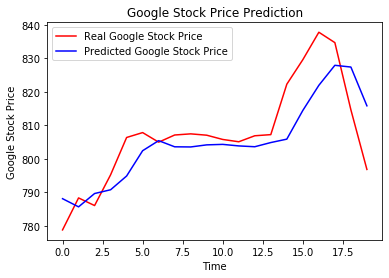

In [62]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()